In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usp-pj01/train_Iris.csv
/kaggle/input/usp-pj01/test_Iris.csv


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [41]:
train = pd.read_csv('../input/usp-pj01/train_Iris.csv')
test = pd.read_csv('../input/usp-pj01/test_Iris.csv')

In [42]:
train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,59,6.6,2.9,4.6,1.3,Iris-versicolor
1,98,6.2,2.9,4.3,1.3,Iris-versicolor
2,130,7.2,3.0,5.8,1.6,Iris-virginica
3,115,5.8,2.8,5.1,2.4,Iris-virginica
4,147,6.3,2.5,5.0,1.9,Iris-virginica


In [43]:
test.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,88,6.3,2.3,4.4,1.3
1,112,6.4,2.7,5.3,1.9
2,11,5.4,3.7,1.5,0.2
3,92,6.1,3.0,4.6,1.4
4,50,5.0,3.3,1.4,0.2


In [44]:
train = train.set_index('Id')
test = test.set_index('Id')

In [45]:
print(train.shape)
print(test.shape)

(120, 5)
(30, 4)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [47]:
X = train.drop('Species', axis=1)
y = train['Species']

In [48]:
print(X.shape)
print(y.shape)

(120, 4)
(120,)


In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

In [50]:
print(X_train.shape)
print(y_train.shape)

(108, 4)
(108,)


In [51]:
print(X_val.shape)
print(y_val.shape)

(12, 4)
(12,)


In [52]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [53]:
pd.DataFrame({'Actual':y_val, 'Predicted':y_pred})

,Actual,Predicted
Id,,
75,Iris-versicolor,Iris-versicolor
129,Iris-virginica,Iris-virginica
34,Iris-setosa,Iris-setosa
95,Iris-versicolor,Iris-versicolor
83,Iris-versicolor,Iris-versicolor
138,Iris-virginica,Iris-virginica
116,Iris-virginica,Iris-virginica
10,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica


In [54]:
matrix = confusion_matrix(y_val,y_pred)
print(matrix)

[[4 0 0]
 [0 3 0]
 [0 0 5]]


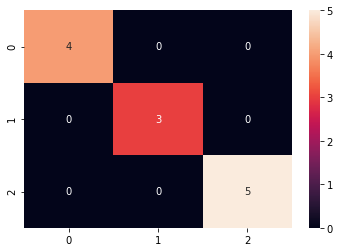

In [55]:
sns.heatmap(matrix, annot=True)
plt.show()

In [56]:
print('Accuracy : ', metrics.accuracy_score(y_val,y_pred))

Accuracy :  1.0


In [57]:
pred = model.predict(test)
pd.DataFrame({'Id':test.index, 'Species':pred}).set_index('Id')

,Species
Id,
88,Iris-versicolor
112,Iris-virginica
11,Iris-setosa
92,Iris-versicolor
50,Iris-setosa
61,Iris-versicolor
73,Iris-virginica
68,Iris-versicolor
40,Iris-setosa


## Thank You!